In [1]:
from defs import print_with_time, create_db_conn, raw_data_dir, interim_data_dir, final_data_dir
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
entradaSaida = 'saida'
uiUti = 'ui'
df0 = pd.read_pickle(interim_data_dir+f'/{entradaSaida}_{uiUti}_horario.pickle')
periodos_mapper = {
    6: '06-12',
    12: '12-18',
    18: '18-24',
    0: '00-06',
}
weekday_mapper = {
    0: 'Segunda-feira',
    1: 'Terça-feira',
    2: 'Quarta-feira',
    3: 'Quinta-feira',
    4: 'Sexta-feira',
    5: 'Sábado',
    6: 'Domingo',
}

In [3]:
df1 = df0[df0['ds'].dt.year <= 2021].copy()
df1['weekday'] = df1['ds'].dt.weekday
df1['hour'] = df1['ds'].dt.hour.map(periodos_mapper)
df1['year'] = df1['ds'].dt.year

df1_hour = df1.groupby(['weekday','hour'])['y'].sum().reset_index()
df1_day = df1.groupby(['weekday'])['y'].sum().reset_index()
df1 = df1_hour.merge(df1_day, on='weekday', how='left', suffixes=(['_hour', '_day']))
df1['y'] = df1['y_hour']/df1['y_day']
df1.drop(['y_hour','y_day'], axis=1, inplace=True)
df2 = df1.pivot_table(columns=['hour'], index=['weekday'], values='y').reset_index().set_index('weekday')
df2.index = df2.index.to_series().map(weekday_mapper)
df2.columns.name = None
df2.style.format('{:.2%}')

,00-06,06-12,12-18,18-24
weekday,,,,
Segunda-feira,1.89%,21.84%,52.15%,24.12%
Terça-feira,2.85%,25.03%,49.06%,23.06%
Quarta-feira,3.00%,28.58%,48.43%,20.00%
Quinta-feira,3.04%,28.43%,48.77%,19.76%
Sexta-feira,2.60%,26.72%,49.62%,21.06%
Sábado,3.45%,30.83%,50.69%,15.03%
Domingo,2.88%,32.28%,54.18%,10.66%


Text(0.5, 1.0, 'Saida UI')

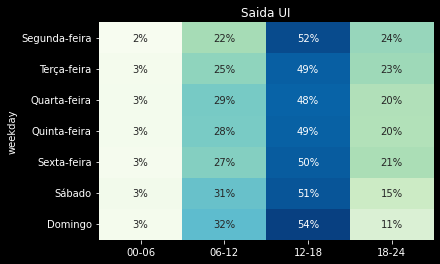

In [4]:
import seaborn as sns
sns.heatmap(df2, annot=True, cmap='GnBu', fmt='.0%', cbar=False)
plt.title(entradaSaida.capitalize() + ' ' + uiUti.upper())

In [5]:
df3 = df1.pivot_table(columns=['hour'], index=['weekday'], values='y').reset_index().set_index('weekday').T
df3.to_json()


'{"0":{"00-06":0.0188802615,"06-12":0.2183898651,"12-18":0.5215365754,"18-24":0.2411932979},"1":{"00-06":0.028487902,"06-12":0.2502954531,"12-18":0.4905766001,"18-24":0.2306400448},"2":{"00-06":0.0299983334,"06-12":0.2857619021,"12-18":0.484250875,"18-24":0.1999888895},"3":{"00-06":0.0303687636,"06-12":0.2843275488,"12-18":0.4877440347,"18-24":0.1975596529},"4":{"00-06":0.0259590024,"06-12":0.2672250243,"12-18":0.4962287724,"18-24":0.210587201},"5":{"00-06":0.0344923815,"06-12":0.3083105431,"12-18":0.506892895,"18-24":0.1503041804},"6":{"00-06":0.0287702622,"06-12":0.3228379869,"12-18":0.5417975049,"18-24":0.1065942459}}'

In [6]:
import json
with open(interim_data_dir+f'/weekday_info_{entradaSaida}_{uiUti}.json', 'w') as f:
    f.write(df3.to_json())

In [7]:
print(f'/weekday_info_{entradaSaida}_{uiUti}.json')

/weekday_info_saida_ui.json
